In [25]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
analysis_dir = Path("/home/srs-9/Projects/ms_mri/monai_analysis")
df_t1 = pd.read_csv(analysis_dir / "choroid_pineal_pituitary_T1-1" / "clinical_data_full.csv")
df_flair = pd.read_csv(analysis_dir / "choroid_pineal_pituitary_FLAIR-1" / "clinical_data_full.csv")
df_t1_flair = pd.read_csv(analysis_dir / "choroid_pineal_pituitary3" / "clinical_data_full.csv")

curr_dir = Path("/home/srs-9/Projects/ms_mri/analysis/paper1")

In [15]:
df = df_t1[['subid', 'ms_type', 'flair_contrast']]
df.loc[df['ms_type'].isin(['CIS', 'RRMS']), 'ms_type'] = 'RMS'
df.loc[df['ms_type'].isin(['PPMS', 'SPMS', 'RPMS', 'PRMS']), 'ms_type'] = 'PMS'

In [16]:
df.loc[:, ['cp_t1_vol']] = df_t1['choroid_volume']
df.loc[:, ['cp_flair_vol']] = df_flair['choroid_volume']
df.loc[:, ['cp_t1.flair_vol']] = df_t1_flair['choroid_volume']

df.loc[:, ['pin_t1_vol']] = df_t1['pineal_volume']
df.loc[:, ['pin_flair_vol']] = df_flair['pineal_volume']
df.loc[:, ['pin_t1.flair_vol']] = df_t1_flair['pineal_volume']

df.loc[:, ['pit_t1_vol']] = df_t1['pituitary_volume']
df.loc[:, ['pit_flair_vol']] = df_flair['pituitary_volume']
df.loc[:, ['pit_t1.flair_vol']] = df_t1_flair['pituitary_volume']

In [17]:
df = df.set_index('subid')

In [21]:
df.to_csv(curr_dir / "inference_volumes.csv")

<BarContainer object of 2 artists>

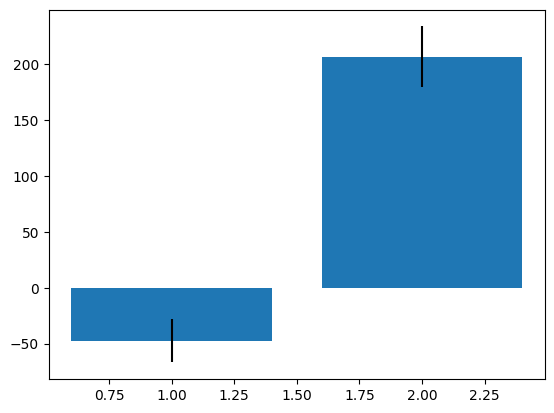

In [26]:
cp_diff = df['cp_t1_vol'] - df['cp_flair_vol']
plt.bar([1, 2], [cp_diff[df['flair_contrast'] == "WITH"].mean(),
                 cp_diff[df['flair_contrast'] == "WITHOUT"].mean()],
                 yerr=[cp_diff[df['flair_contrast'] == "WITH"].sem(),
                       cp_diff[df['flair_contrast'] == "WITHOUT"].sem()])

<BarContainer object of 2 artists>

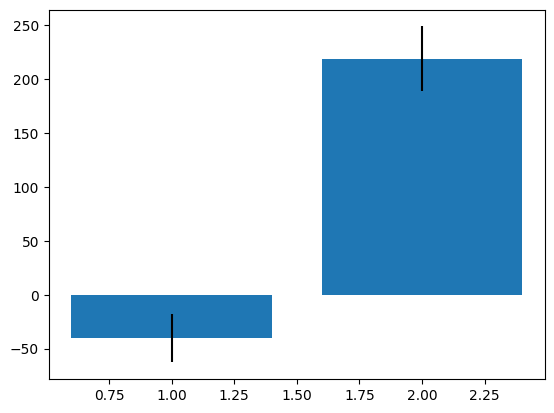

In [27]:
cond1 = (df['flair_contrast'] == "WITH") & (df['ms_type'].isin(['RMS', 'PMS']))
cond2 = (df['flair_contrast'] == "WITHOUT") & (df['ms_type'].isin(['RMS', 'PMS']))

plt.bar([1, 2], [cp_diff[cond1].mean(), cp_diff[cond2].mean()],
                 yerr=[cp_diff[cond1].sem(), cp_diff[cond2].sem()])

<BarContainer object of 2 artists>

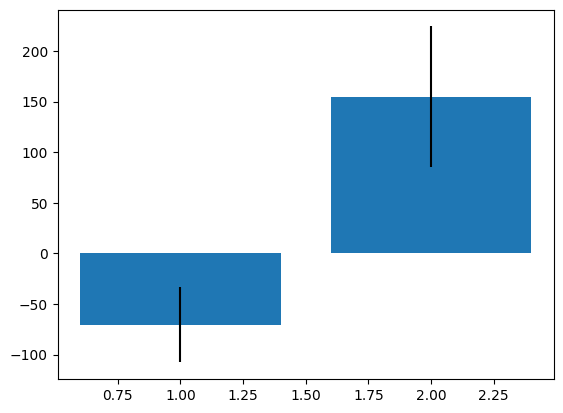

In [28]:
cond1 = (df['flair_contrast'] == "WITH") & (df['ms_type'].isin(['OIND', 'NIND']))
cond2 = (df['flair_contrast'] == "WITHOUT") & (df['ms_type'].isin(['OIND', 'NIND']))

plt.bar([1, 2], [cp_diff[cond1].mean(), cp_diff[cond2].mean()],
                 yerr=[cp_diff[cond1].sem(), cp_diff[cond2].sem()])